<a href="https://colab.research.google.com/github/Nao-Ishi/pray_py/blob/master/3pich_man_ani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pillow

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import math

No handles with labels found to put in legend.
No handles with labels found to put in legend.


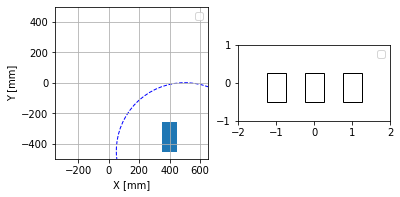

In [0]:
import matplotlib.patches as patches
###############################
#キャンパス設定

fig = plt.figure()
#plt.cla()
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.0, hspace=1.0)
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

Mx=650
mx=-350
My=500
my=-500

ax.set_xlim(mx,Mx)
ax.set_ylim(my,My)
ax.set_aspect('equal')

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')

ax.grid(True)

ax.legend()
################################

cir_r = 450
cir_x = 500
cir_y = -450

rect_w = 100
rect_h = 200
rect_x = 400
rect_y = -458

################################
#   _________
#   |       |
#   |       |
#   |       |
#   |   .   |   (x,y)
#   ^^^^^^^^^
################################

c = patches.Circle(xy=(cir_x, cir_y), radius=cir_r, ec='b', ls='--',fill=False)
r = patches.Rectangle(xy=(rect_x-(rect_w/2), rect_y), width=rect_w, height=rect_h)
ax.add_patch(c)
ax.add_patch(r)

Mx=2
mx=-2
My=1
my=-1

ax2.set_xlim(mx,Mx)
ax2.set_ylim(my,My)
ax2.set_aspect('equal')

#ax2.set_xlabel('X [mm]')
#ax2.set_ylabel('Y [mm]')

#ax.grid(True)

ax2.legend()

r = patches.Rectangle(xy=(-1.25,-0.5 ), width=0.5, height=0.75, fill=False)
ax2.add_patch(r)
r = patches.Rectangle(xy=(-0.25,-0.5 ), width=0.5, height=0.75, fill=False)
ax2.add_patch(r)
r = patches.Rectangle(xy=(0.75,-0.5 ), width=0.5, height=0.75, fill=False)
ax2.add_patch(r)


#step_test = ax.plot(0.05,0.9,'',transform=ax.transAxes)
plt.show()

In [0]:
T = np.arange(110.0,160.0)
tag, = ax.plot([0], [0], 'yo')
p1, = ax.plot([0], [0], 'bo')
p2, = ax.plot([0], [0], 'ro')
p3, = ax.plot([0], [0], 'go')
l1, = ax.plot([0, 0], [0, 0], 'g')
l1_, = ax2.plot([0, 0], [0, 0], 'g')
l2, = ax.plot([0, 0], [0, 0], 'b')
l2_, = ax2.plot([0, 0], [0, 0], 'b')
l3, = ax.plot([0, 0], [0, 0], 'r')
l3_, = ax2.plot([0, 0], [0, 0], 'r')
L1 = 150
L2 = 250
PI = np.pi

Sheta = np.array([[0.0]*3 for i in range(len(T))])

def draw_ani(t):
    at = np.radians(T[t])
    xt = np.cos(at) * cir_r + cir_x
    yt = np.sin(at) * cir_r + cir_y
    ##########################
    #https://so-zou.jp/robot/tech/kinematics/inverse-kinematics.htm#
    alpha = np.arccos(
        ((-1)*(xt*xt+yt*yt)+L2*L2+L1*L1)
        /(2*L1*L2)
    )
    
    beta = np.arccos(
        ((-1)*(L2*L2)+(L1*L1)+(xt*xt+yt*yt))
        /(2*L1*np.sqrt(xt*xt+yt*yt))
    )
    sheta1 = np.arctan2(yt,xt)-beta
    sheta2 = (PI - alpha)
    ##########################
    xp1 = np.cos(sheta1)*L1
    yp1 = np.sin(sheta1)*L1
    p1.set_data(xp1,yp1)

    xp2 = np.cos(sheta1+sheta2)*L2
    yp2 = np.sin(sheta1+sheta2)*L2
    p2.set_data(xp1+xp2,yp1+yp2)

    sheta3 = np.arctan2(
        (-yp1-yp2+rect_y+rect_h/2)
        ,(-xp1-xp2+rect_x)
    )
    xp3 = np.cos(sheta3)*100
    yp3 = np.sin(sheta3)*100
    ##########################
    
    tag.set_data(xt, yt)
    l1.set_data([0,xp1],[0,yp1])
    l2.set_data([xp1,xp1+xp2],[yp1,yp1+yp2])
    l3.set_data([xp1+xp2,xp1+xp2+xp3],[yp1+yp2,yp1+yp2+yp3])
    ##########################
    
    xp1 = np.cos(sheta1+(PI/4))*0.5-1
    yp1 = np.sin(sheta1+(PI/4))*0.5
    l1_.set_data([-1,xp1],[0,yp1])

    xp2 = np.cos(sheta2-(PI/4))*0.5
    yp2 = np.sin(sheta2-(PI/4))*0.5
    l2_.set_data([0,xp2],[0,yp2])

    xp3 = np.cos(sheta3*2)*0.5+1
    yp3 = np.sin(sheta3*2)*0.5
    l3_.set_data([1,xp3],[0,yp3])
    ##########################
    Sheta[t][0]=sheta1+(PI/4)
    Sheta[t][1]=sheta2-(PI/4)
    Sheta[t][2]=sheta3*2+(PI/2)
    return tag, #p1, p2, p3, l1, l2, l3, l1_,

#アニメーションの描画
ani = animation.FuncAnimation(
      fig,  # Figureオブジェクト
      draw_ani,  # グラフ描画関数
      frames = len(T),  # フレームを設定
      interval = 100,  # 更新間隔(ms)
      repeat = True,  # 描画を繰り返す
      blit = True  # blitting による処理の高速化
      )

ani.save('normaldist_kde_anim.gif', writer='pillow')
plt.show()

In [0]:
Sheta_deg = np.array([[0.0]*3 for i in range(len(T))])
Sheta_deg = Sheta*180/PI
print(Sheta_deg)

[[  1.14961543  16.73573377 -71.49162655]
 [ -2.19145612  20.8919945  -68.84682622]
 [ -5.42815375  24.78355046 -66.18796339]
 [ -8.58583592  28.44790463 -63.51530515]
 [-11.68376231  31.91274372 -60.82914236]
 [-14.73689625  35.19890221 -58.12978978]
 [-17.7570247   38.32223704 -55.41758632]
 [-20.7534747   41.29486344 -52.69289498]
 [-23.73357839  44.12599795 -49.9561029 ]
 [-26.70297394  46.82255034 -47.20762116]
 [-29.66579561  49.38955017 -44.44788459]
 [-32.6247865   51.83046197 -41.67735141]
 [-35.58135678  54.14742425 -38.89650276]
 [-38.53560395  56.34143651 -36.10584219]
 [-41.48630819  58.41251107 -33.30589493]
 [-44.43091419  60.35980214 -30.49720718]
 [-47.36551012  62.18172158 -27.68034519]
 [-50.28481433  63.87604836 -24.85589424]
 [-53.18218026  65.44003747 -22.02445759]
 [-56.04963009  66.87053223 -19.18665527]
 [-58.87792661  68.16408281 -16.34312275]
 [-61.65669138  69.31707217 -13.49450957]
 [-64.37457436  70.32584893 -10.64147791]
 [-67.0194765   71.18686522  -7.78

In [0]:
Sheta_krs = np.array([[0.0]*3 for i in range(len(T))])
Sheta_krs_i = np.array([[0]*3 for i in range(len(T))])
Sheta_krs = (Sheta_deg+135)/270*8000+3500
#print(Sheta_krs)
for i in range(len(Sheta_krs)):
  for j in range(len(Sheta_krs[0])):
    if (j == 2):
      Sheta_krs_i[i][j] = (int(Sheta_krs[i][j])-7500) * (-1) + 7500
    else :
      Sheta_krs_i[i][j] = int(Sheta_krs[i][j])
print(Sheta_krs_i)

[[7534 7995 9619]
 [7435 8119 9540]
 [7339 8234 9462]
 [7245 8342 9382]
 [7153 8445 9303]
 [7063 8542 9223]
 [6973 8635 9143]
 [6885 8723 9062]
 [6796 8807 8981]
 [6708 8887 8899]
 [6621 8963 8817]
 [6533 9035 8735]
 [6445 9104 8653]
 [6358 9169 8570]
 [6270 9230 8487]
 [6183 9288 8404]
 [6096 9342 8321]
 [6010 9392 8237]
 [5924 9438 8153]
 [5839 9481 8069]
 [5755 9519 7985]
 [5673 9553 7900]
 [5592 9583 7816]
 [5514 9609 7731]
 [5438 9630 7646]
 [5365 9646 7562]
 [5295 9658 7477]
 [5229 9665 7392]
 [5167 9668 7307]
 [5110 9665 7222]
 [5056 9658 7137]
 [5008 9647 7052]
 [4964 9630 6968]
 [4926 9609 6883]
 [4892 9584 6799]
 [4864 9554 6714]
 [4840 9520 6630]
 [4822 9482 6546]
 [4809 9440 6462]
 [4800 9393 6379]
 [4796 9343 6295]
 [4797 9289 6212]
 [4802 9232 6129]
 [4811 9170 6046]
 [4825 9106 5964]
 [4843 9037 5882]
 [4865 8965 5800]
 [4890 8889 5719]
 [4920 8809 5638]
 [4954 8725 5557]]


In [0]:
path = 'angs.txt'

head = 'unsigned int angs[' + str(len(Sheta_krs_i)) + '][3] = {\n'
bottom = '};'

with open(path, mode='w') as f:
  pass

with open(path, mode='a') as f:
  f.write(head)
  for i in range(len(Sheta_krs_i)):
    f.write('{')
    for j in range(len(Sheta_krs_i[0])):
      f.write(str(Sheta_krs_i[i][j]))
      if(j != 2):
        f.write(',')
    f.write('}')
    if(i != len(Sheta_krs_i)-1):
      f.write(',\n')
  f.write(bottom)

with open(path) as f:
  print(f.read())


unsigned int angs[50][3] = {
{7534,7995,9619},
{7435,8119,9540},
{7339,8234,9462},
{7245,8342,9382},
{7153,8445,9303},
{7063,8542,9223},
{6973,8635,9143},
{6885,8723,9062},
{6796,8807,8981},
{6708,8887,8899},
{6621,8963,8817},
{6533,9035,8735},
{6445,9104,8653},
{6358,9169,8570},
{6270,9230,8487},
{6183,9288,8404},
{6096,9342,8321},
{6010,9392,8237},
{5924,9438,8153},
{5839,9481,8069},
{5755,9519,7985},
{5673,9553,7900},
{5592,9583,7816},
{5514,9609,7731},
{5438,9630,7646},
{5365,9646,7562},
{5295,9658,7477},
{5229,9665,7392},
{5167,9668,7307},
{5110,9665,7222},
{5056,9658,7137},
{5008,9647,7052},
{4964,9630,6968},
{4926,9609,6883},
{4892,9584,6799},
{4864,9554,6714},
{4840,9520,6630},
{4822,9482,6546},
{4809,9440,6462},
{4800,9393,6379},
{4796,9343,6295},
{4797,9289,6212},
{4802,9232,6129},
{4811,9170,6046},
{4825,9106,5964},
{4843,9037,5882},
{4865,8965,5800},
{4890,8889,5719},
{4920,8809,5638},
{4954,8725,5557}};
